### Importing Libraries and Data

In [647]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import sklearn.metrics as sm
import re

In [651]:
df = pd.read_csv('website_classification.csv')
df.head(5)

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.htmlfree?aid=174...,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [652]:
df.info() #checking if there is any Nan or null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   website_url           1583 non-null   object
 1   cleaned_website_text  1583 non-null   object
 2   Category              1583 non-null   object
dtypes: object(3)
memory usage: 37.2+ KB


In [653]:
df

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.htmlfree?aid=174...,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
5,https://book.priceline.com/?refid=8431&refclic...,hotel reservations bundle save book flight sal...,Travel
6,https://www.trip.com/index?locale=en_us&allian...,official travel deals promotion choose million...,Travel
7,https://www.orbitz.com/,bot create free account create free account si...,Travel
8,https://www.travelocity.com/,bot create free account create free account si...,Travel
9,https://www.hotwire.com/,cheap hotels cars flights minute travel deals ...,Travel


### Visualising distribution of website categories

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   website_url           1583 non-null   object
 1   cleaned_website_text  1583 non-null   object
 2   Category              1583 non-null   object
dtypes: object(3)
memory usage: 37.2+ KB


In [655]:
df.drop(df[(df['Category']=='Education') | (df['Category']=='Food') | (df['Category']=='Health and Fitness') | (df['Category']=='Photography') | (df['Category'] == 'E-Commerce') | (df['Category'] == 'Travel')].index, inplace = True)

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 36 to 1586
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   website_url           983 non-null    object
 1   cleaned_website_text  983 non-null    object
 2   Category              983 non-null    object
dtypes: object(3)
memory usage: 30.7+ KB


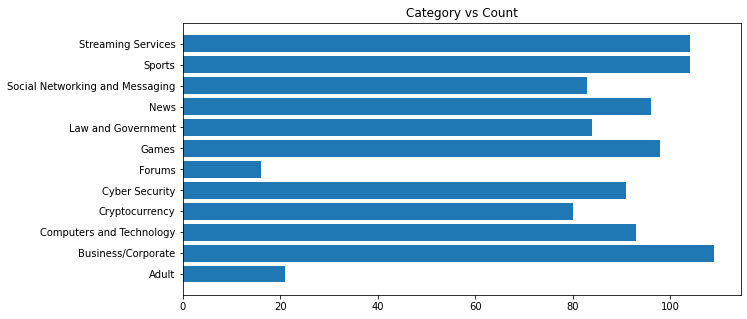

In [656]:
#visualising the count of each category
plt.figure(figsize=(10,5))
plt.title("Category vs Count")
site_category_count = pd.DataFrame(df.groupby(df['Category']).size(),columns=['Count'])
plt.barh(width=site_category_count['Count'],y=site_category_count.index)
plt.show()

In [657]:
site_category_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Adult to Streaming Services
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   12 non-null     int64
dtypes: int64(1)
memory usage: 192.0+ bytes


In [658]:
print("Different categories of websites: ",len(site_category_count["Count"]))

Different categories of websites:  12


### Data Cleaning & Engineering

##### NLP pipeline
##### 1. Text processing
######    - Cleaning
######    - Normalization (changing to lowercase and removing punctuation)
######    - Word Tokenisation
######    - Remove stop words
######    - Remove Non-alpha text
######    - Word Stemming and Lemmatization

##### 2. Feature Engineering
######    - Label Encoding for Categories
######    - Bag of Words (CountVectorizer)
######    - TF-IDF (Bag of Words + Tf-IDF = TfidfVectorizer)
######    - Word Embeddings (word2vec/glove)

##### 3. Feature Selection

In [659]:
df.drop(columns=['website_url'],inplace=True)

In [660]:
df.tail()

,cleaned_website_text,Category
1578,it security management tools free software tri...,Cyber Security
1579,axonius cybersecurity asset management saas ma...,Cyber Security
1580,secureworks cybersecurity leader proven threat...,Cyber Security
1581,leading managed detection and response trustwa...,Cyber Security
1582,ddos mitigation software tools arbor ddos plat...,Cyber Security


Normalizing text: convert to lowercase and remove punctuation

In [661]:
df['cleaned_website_text'] = df['cleaned_website_text'].apply(lambda x: x.lower())
df['cleaned_website_text'] = df['cleaned_website_text'].apply(lambda x: re.sub(r'[^\w\s]','',x))

In [662]:
df.head()

,cleaned_website_text,Category
36,origin dns error cloudflare error origin dns e...,Social Networking and Messaging
43,bandwidth limit exceed bandwidth limit exceed ...,News
107,stream live tv sports fubotv free trial sport ...,Streaming Services
108,stream tv movie live online hulu watch tv show...,Streaming Services
109,youtube tv watch dvr live sports shows news st...,Streaming Services


Tokenising: Split sentence into list of words

In [663]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df['cleaned_website_text'] = df['cleaned_website_text'].apply(lambda x: word_tokenize(x))
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,cleaned_website_text,Category
36,"[origin, dns, error, cloudflare, error, origin...",Social Networking and Messaging
43,"[bandwidth, limit, exceed, bandwidth, limit, e...",News
107,"[stream, live, tv, sports, fubotv, free, trial...",Streaming Services
108,"[stream, tv, movie, live, online, hulu, watch,...",Streaming Services
109,"[youtube, tv, watch, dvr, live, sports, shows,...",Streaming Services
110,"[watchtv, stream, channel, live, tv, want, wat...",Streaming Services
111,"[live, tv, streaming, klowdtv, klowdtv, provid...",Streaming Services
112,"[pluto, tv, watch, free, tv, movies, online, a...",Streaming Services
113,"[xumo, free, movie, xumo, ultimate, destinatio...",Streaming Services
114,"[watch, tv, serial, original, show, movies, ne...",Streaming Services


Removing Stopwords

In [664]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

df['cleaned_website_text'] = df['cleaned_website_text'].apply(lambda x: [word for word in x if word not in stop_words])
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_website_text,Category
36,"[origin, dns, error, cloudflare, error, origin...",Social Networking and Messaging
43,"[bandwidth, limit, exceed, bandwidth, limit, e...",News
107,"[stream, live, tv, sports, fubotv, free, trial...",Streaming Services
108,"[stream, tv, movie, live, online, hulu, watch,...",Streaming Services
109,"[youtube, tv, watch, dvr, live, sports, shows,...",Streaming Services
110,"[watchtv, stream, channel, live, tv, want, wat...",Streaming Services
111,"[live, tv, streaming, klowdtv, klowdtv, provid...",Streaming Services
112,"[pluto, tv, watch, free, tv, movies, online, a...",Streaming Services
113,"[xumo, free, movie, xumo, ultimate, destinatio...",Streaming Services
114,"[watch, tv, serial, original, show, movies, ne...",Streaming Services


Word Stemming and Lemmatization

In [665]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return 'a'
    elif nltk_tag.startswith('V'):
        return 'v'
    elif nltk_tag.startswith('R'):
        return 'r'
    else:
        return 'n'
    
#Define function to lemmatize each word with its POS tag
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text)
    pos_tagged_text = [(word, pos_tagger(pos_tag)) for word, pos_tag in pos_tagged_text]
    return [lem.lemmatize(word, pos_tag) for word, pos_tag in pos_tagged_text]

df['cleaned_website_text'] = df['cleaned_website_text'].apply(lambda x: lemmatize_words(x))
df

,cleaned_website_text,Category
36,"[origin, dns, error, cloudflare, error, origin...",Social Networking and Messaging
43,"[bandwidth, limit, exceed, bandwidth, limit, e...",News
107,"[stream, live, tv, sport, fubotv, free, trial,...",Streaming Services
108,"[stream, tv, movie, live, online, hulu, watch,...",Streaming Services
109,"[youtube, tv, watch, dvr, live, sport, show, n...",Streaming Services
110,"[watchtv, stream, channel, live, tv, want, wat...",Streaming Services
111,"[live, tv, stream, klowdtv, klowdtv, provide, ...",Streaming Services
112,"[pluto, tv, watch, free, tv, movie, online, ap...",Streaming Services
113,"[xumo, free, movie, xumo, ultimate, destinatio...",Streaming Services
114,"[watch, tv, serial, original, show, movie, new...",Streaming Services


In [666]:
#joining tokenized words
df['cleaned_website_text'] = df['cleaned_website_text'].apply(lambda x: ' '.join(x))

Feature extraction: Label Encoding

In [667]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df

,cleaned_website_text,Category
36,origin dns error cloudflare error origin dns e...,9
43,bandwidth limit exceed bandwidth limit exceed ...,8
107,stream live tv sport fubotv free trial sport d...,11
108,stream tv movie live online hulu watch tv show...,11
109,youtube tv watch dvr live sport show news stre...,11
110,watchtv stream channel live tv want watchtv ex...,11
111,live tv stream klowdtv klowdtv provide live tv...,11
112,pluto tv watch free tv movie online apps pluto...,11
113,xumo free movie xumo ultimate destination stre...,11
114,watch tv serial original show movie news live ...,11


In [668]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['cleaned_website_text'],df['Category'],test_size=0.2,random_state=0)

In [669]:
X_train

145     soundcloud listen free music podcast soundclou...
1494    cybersecurity nistnist develop cybersecurity s...
584     suresource24 break news investigation entertai...
1310    industrial system fabrication isf pnw convenie...
352     chat free chat room chat room free chat room c...
581     excite news find late breaking news informatio...
1191    neural network wikipedia neural network conten...
861     bad day la bad day la bad flatulence day zom b...
123     ameba smart kid tv free child video stream ser...
598     welcome upsc upsc search form union public ser...
1544    cdc page foundpage find otherpage find oops se...
1239    human centre artificial intelligence lab holzi...
547     australia lead news site people think cover is...
615     home dea breadcrumb texas clinic owner clinic ...
167     watch live explore world eye somebody live bro...
184     streamyard engage facebook youtube live audien...
1346    quixote group research marketing pr quixote gr...
298     diario

Feature extraction: Tf-idf vectorizer

In [670]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_id_vectorizer = TfidfVectorizer(max_features=5000)
tf_id_train = tf_id_vectorizer.fit_transform(X_train)
tf_id_test = tf_id_vectorizer.transform(X_test)

In [671]:
tf_id_train = tf_id_train.toarray()
tf_id_test = tf_id_test.toarray()

Model training

In [672]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your training data (X_train) and corresponding labels (y_train)

# Define the models and their respective hyperparameters to try during grid search
models = {
    'MNB': {
        'model': MultinomialNB(),
        'params': {
            'mnb__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'svm__C': [1, 10, 100],
            'svm__kernel': ['linear', 'rbf']
        }
    }
}

# Perform grid search and cross-validation for each model
for model_name, model_data in models.items():
    print("Evaluating:", model_name)
    
    # Create a pipeline with a TF-IDF vectorizer and the current model
    pipeline = Pipeline([
        (model_name.lower(), model_data['model'])
    ])
    
    # Define the hyperparameters for the current model
    parameters = model_data['params']
    
    # Perform grid search with 5-fold cross-validation
    grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')
    grid_search.fit(tf_id_train, y_train)
    
    # Get the best model and its corresponding hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Make predictions on the test set
    y_pred = best_model.predict(tf_id_test)
    
    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print("Best parameters:", best_params)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 score:", f1)
    print("----------------------------------")

Evaluating: MNB


c:\Users\User01\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters: {'mnb__alpha': 0.1}
Accuracy: 0.9285714285714286
Precision: 0.9157069397066712
Recall: 0.9285714285714286
F1 score: 0.9196851373746714
----------------------------------
Evaluating: SVM
Best parameters: {'svm__C': 10, 'svm__kernel': 'linear'}
Accuracy: 0.9132653061224489
Precision: 0.9206441866274677
Recall: 0.9132653061224489
F1 score: 0.9084786602152984
----------------------------------


In [685]:
model = MultinomialNB(alpha=0.1)
model.fit(tf_id_train,y_train)

MultinomialNB(alpha=0.1)

In [686]:
import sklearn.metrics as sm

y_pred = model.predict(tf_id_test)
print(f'The accuracy of train model is {sm.accuracy_score(y_train,model.predict(tf_id_train))}')
print(f'The accuracy of test model is {sm.accuracy_score(y_test,y_pred)}')

The accuracy of train model is 0.9833971902937421
The accuracy of test model is 0.9285714285714286


In [687]:
from bs4 import BeautifulSoup
import bs4 as bs4
from urllib.parse import urlparse
import requests
import pandas as pd
import os


class ScrapTool:
    def visit_url(self,website_url):
        '''
        Visit URL. Download the Content. Initialize the beautifulsoup object. Call parsing methods. Return Series object.
        '''
        content = requests.get(website_url,timeout=60).content
        soup = BeautifulSoup(content,'lxml')
        result = {
            "website_url": website_url,
            "website_name": self.get_website_name(website_url),
            "website_text": self.get_html_title_tag(soup)+self.get_html_meta_tags(soup)+self.get_html_heading_tags(soup)+
                                                               self.get_text_content(soup)
        }
        
        #Convert to Series object and return
        return pd.Series(result)
    
    def get_website_name(self,website_url):
        '''
        Example: returns "google" from "www.google.com"
        '''
        return "".join(urlparse(website_url).netloc.split(".")[-2])
    
    def get_html_title_tag(self,soup):
        '''Return the text content of <title> tag from a webpage'''
        return '. '.join(soup.title.contents)
    
    def get_html_meta_tags(self,soup):
        '''Returns the text content of <meta> tags related to keywords and description from a webpage'''
        tags = soup.find_all(lambda tag: (tag.name=="meta") & (tag.has_attr('name') & (tag.has_attr('content'))))
        content = [str(tag["content"]) for tag in tags if tag["name"] in ['keywords','description']]
        return ' '.join(content)
    
    def get_html_heading_tags(self,soup):
        '''returns the text content of heading tags. The assumption is that headings might contain relatively important text.'''
        tags = soup.find_all(["h1","h2","h3","h4","h5","h6"])
        content = [" ".join(tag.stripped_strings) for tag in tags]
        return ' '.join(content)
    
    def get_text_content(self,soup):
        '''returns the text content of the whole page with some exception to tags. See tags_to_ignore.'''
        tags_to_ignore = ['style', 'script', 'head', 'title', 'meta', '[document]',"h1","h2","h3","h4","h5","h6","noscript"]
        tags = soup.find_all(text=True)
        result = []
        for tag in tags:
            stripped_tag = tag.strip()
            if tag.parent.name not in tags_to_ignore\
                and isinstance(tag, bs4.element.Comment)==False\
                and not stripped_tag.isnumeric()\
                and len(stripped_tag)>0:
                result.append(stripped_tag)
        return ' '.join(result)

In [688]:
#cleaning text and preprocessing
def cleaning_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'\d+','',text)   
    text = word_tokenize(text)
    text = [word for word in text if word not in stop_words]
    text = lemmatize_words(text)
    text = ' '.join(text)
    vector = tf_id_vectorizer.transform([text])
    vector = vector.toarray()
    return vector

In [689]:
def website_prediction(website,model):
    scrapTool = ScrapTool()
    try:
        web = dict(scrapTool.visit_url(website))
        text = cleaning_text(web['website_text'])
        prediction = model.predict(text)
        print(f'The website is under the category of {le.inverse_transform(prediction)[0]}')
    except:
        print("Connection Timeout")

In [690]:
import pickle

filename = 'model/webtextClassification.sav'
pickle.dump(model, open(filename, 'wb'))

#loading the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(tf_id_test, y_test)
print(result)

0.9285714285714286


              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.93      0.96      0.94        26
           2       0.94      1.00      0.97        15
           3       0.88      1.00      0.94        15
           4       1.00      0.88      0.93        24
           5       0.00      0.00      0.00         0
           6       0.95      0.95      0.95        19
           7       1.00      1.00      1.00        14
           8       0.95      0.90      0.93        21
           9       0.90      0.95      0.92        19
          10       1.00      0.78      0.88        18
          11       1.00      0.89      0.94        19

    accuracy                           0.93       196
   macro avg       0.87      0.86      0.86       196
weighted avg       0.95      0.93      0.94       196



c:\Users\User01\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User01\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User01\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

<AxesSubplot:>

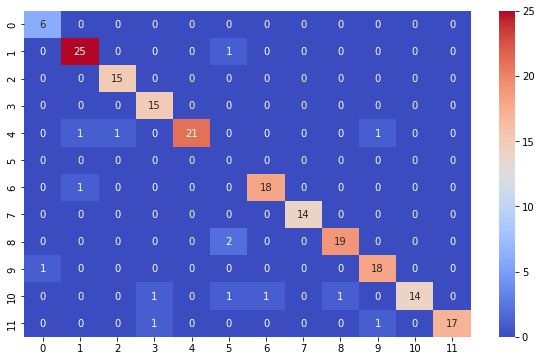

In [691]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

plt.figure(figsize=(10,6))
predictions = model.predict(tf_id_test)
print(classification_report(predictions,y_test))
sns.heatmap(confusion_matrix(predictions,y_test),cmap='coolwarm',annot=True)

In [692]:
pd.set_option('display.max_rows', None)
predictions = model.predict(tf_id_test)
pd.DataFrame({'Cleaned Text':X_test,'Actual':y_test,'Predicted':predictions})

,Cleaned Text,Actual,Predicted
384,free webcam chat room camamba free webcam chat...,9,9
661,uk parliament uk parliament house work behalf ...,7,7
1389,home theater marketplace home theater seat qui...,1,1
774,chessdom chess chess news live chess game tcec...,6,6
1498,cloud security endpoint cybersecurity trend mi...,4,4
1502,leader cybersecurity protection software moder...,4,4
1371,home columbia bank columbia bank northwest com...,1,1
665,inter parliamentary union democracy impact nat...,7,7
1463,cryptocurrency exchange crypto altcoin swap pl...,3,3
585,home official website ministry environment for...,7,7


In [681]:
website ="https://www.nexvisionlab.com/"
website_prediction(website,loaded_model)

The website is under the category of Computers and Technology
